In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter
from scipy.signal import filtfilt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

In [3]:
pupil = pd.read_csv('pupil_positions.csv') #read csv file
pupil.head()

,timestamp,index,id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,1230.333359,0,0,1.0,0.753550,0.494553,46.868901,3d c++,241.135903,121.307332,...,-0.334263,-0.910077,2.030019,1.229974,-1.307815,199.51587,159.208092,229.420334,229.420334,90.0
1,1230.369361,0,0,1.0,0.753670,0.494420,46.850263,3d c++,241.174398,121.339183,...,-0.334029,-0.910088,2.029208,1.230222,-1.307533,199.51587,159.208092,229.420334,229.420334,90.0
2,1230.401363,1,0,1.0,0.753583,0.494463,46.817822,3d c++,241.146576,121.328785,...,-0.334102,-0.910117,2.027790,1.230144,-1.307754,199.51587,159.208092,229.420334,229.420334,90.0
3,1230.433339,2,0,1.0,0.753654,0.494829,46.891591,3d c++,241.169173,121.240957,...,-0.334747,-0.909824,2.031115,1.229459,-1.307462,199.51587,159.208092,229.420334,229.420334,90.0
4,1230.469345,3,0,1.0,0.753714,0.494715,46.947081,3d c++,241.188539,121.268370,...,-0.334552,-0.909858,2.033503,1.229666,-1.307328,199.51587,159.208092,229.420334,229.420334,90.0


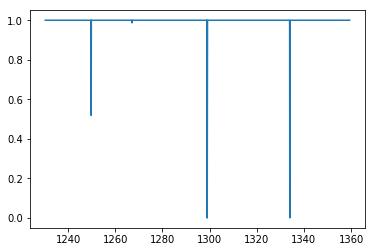

In [4]:
plt.plot(pupil['timestamp'],pupil['confidence'])

In [5]:
pupil['time']= pupil['timestamp']-pupil['timestamp'][0] 

# Time Interpolation

In [6]:
#time interpolation
for ind in pupil[pupil["confidence"]<0.5].index:
    if ind-1 > 0 and ind+1 < pupil.shape[0]:
        pupil.ix[ind, "norm_pos_x"] = pupil['norm_pos_x'].mean()
        pupil.ix[ind, "norm_pos_y"] = pupil['norm_pos_y'].mean()
        pupil.ix[ind, "confidence"] = pupil['confidence'].mean()

/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing

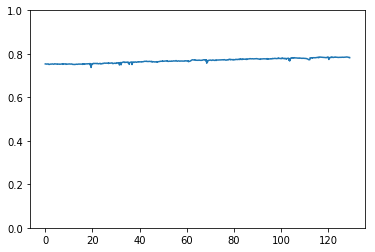

In [7]:
plt.ylim(0, 1.0)#limit at axis

plt.plot(pupil['time'],pupil['norm_pos_x'])

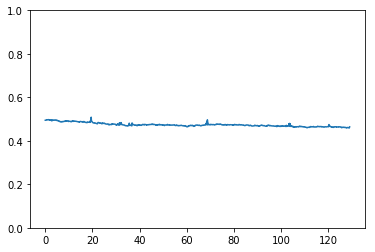

In [8]:
plt.ylim(0, 1.0)
plt.plot(pupil['time'],pupil['norm_pos_y'])

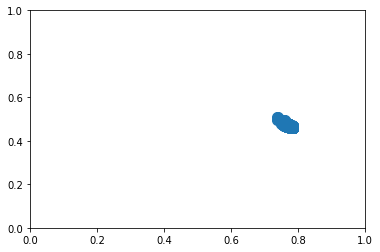

In [9]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(pupil['norm_pos_x'],pupil['norm_pos_y'],marker = 'o',markersize = 10)

In [10]:
pupil_normal = pupil[: 1800]
pupil_dynamic = pupil[-1800 :]

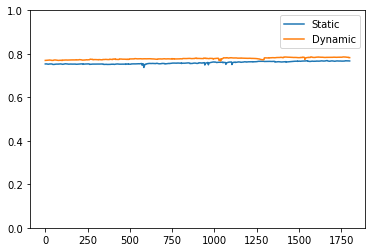

In [11]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], label = 'Dynamic')
plt.legend()

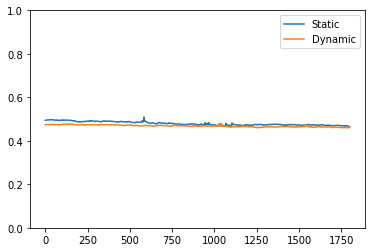

In [12]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_y'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_y'], label = 'Dynamic')
plt.legend()

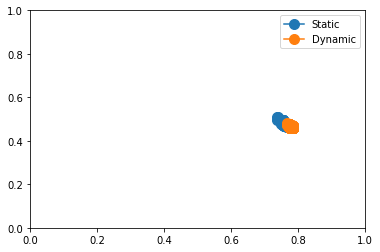

In [13]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)

plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], pupil_normal['norm_pos_y'],label = 'Static',marker = 'o',markersize = 10)
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], pupil_dynamic['norm_pos_y'],label = 'Dynamic',marker = 'o',markersize = 10)
plt.legend()

In [14]:
X_1 = pupil_normal['norm_pos_x'].mean()
X_2 = pupil_dynamic['norm_pos_x'].mean()

In [15]:
Y_1 = pupil_normal['norm_pos_y'].mean()
Y_2 = pupil_dynamic['norm_pos_y'].mean()


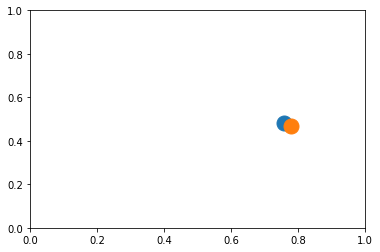

In [16]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(X_1,Y_1,marker = 'o',markersize = 15)
plt.plot(X_2,Y_2,marker = 'o',markersize = 15)

# ttest

In [17]:
from scipy.stats import ttest_ind
t1 = ttest_ind(pupil_normal['norm_pos_x'], pupil_dynamic['norm_pos_x'])
t1

Ttest_indResult(statistic=-114.44034629299438, pvalue=0.0)

# MSE

In [18]:
X_mean = pupil_normal['norm_pos_x'].mean()
mse = ((X_mean - pupil_normal['norm_pos_x']) ** 2).mean(axis = None)
mse

3.1937537998420556e-05

In [19]:
Y_mean = pupil_normal['norm_pos_y'].mean()
mse = ((X_mean - pupil_normal['norm_pos_y']) ** 2).mean(axis = None)
mse

0.07802427686971934

In [20]:

mse = ((X_mean - pupil_dynamic['norm_pos_x']) ** 2).mean(axis = None)
mse

0.00039106542292297904

In [21]:

mse = ((Y_mean - pupil_dynamic['norm_pos_y']) ** 2).mean(axis = None)
mse

0.00014879222231906156

# VELOCITY

In [22]:
X_norm = pupil['norm_pos_x']
Y_norm = pupil['norm_pos_y']
f_s=300
f_c=2
b, a = butter(2, f_c/(f_s/2))
Y = filtfilt(b, a, Y_norm)
b, a = butter(2, f_c/(f_s/2))
X = filtfilt(b, a, X_norm)
f_c=100
def smooth(a,WSZ = 5):
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))
b, a = butter(2, f_c/(f_s/2))
dX = np.diff(filtfilt(b, a, X) * f_s)
dX = smooth(dX)
f_c=100
b, a = butter(2, f_c/(f_s/2))
dY = np.diff(filtfilt(b, a, Y) * f_s)
dY = smooth(dY)


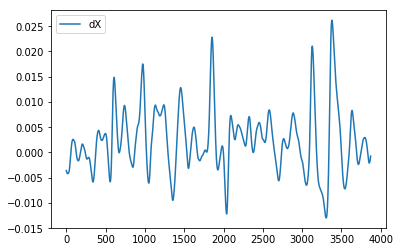

In [25]:
plt.plot(dX, label = 'dX')
plt.legend()

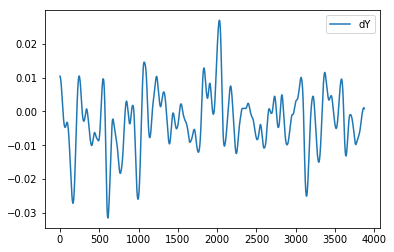

In [24]:
plt.plot(dY, label = 'dY')
plt.legend()